## Modelo de regresion lineal simple
### Cuentas carreras puede desarrollar un equipo en función de las carreras hechas, de futbol

In [39]:
#tratamiento de los datos
import pandas as pd
import numpy as np

In [40]:
#gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn  as sns 

In [41]:
#preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [42]:
#configuración matplotlib
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['savefig.bbox'] = 'tight'
style.use('ggplot') or plt.style.use ('ggplot')

In [43]:
#configuración de warnings
import warnings 
warnings.filterwarnings('ignore')


In [44]:
#datos
equipos = ['texas','boston','detroit','kansas','st.','new_s','new_y','milwaukee','colorado','houston','baltimore',
           'los_an','chicago','cincinnati','los_p','philadelphia','chicago','cleveland','arizona','toronto','minnesota',
           'florida','pittsburg','oakland','tampa','atlanta','washington','san.f','san.i','seattle']

bateos = [5659,5710,5563,5672,5532,5600,5518,5547,5544,5598,5585,5436,5549,5612,5513,5579,5502,5509,5421,5559,
          5487,5508,5421,5452,5436,5528,5441,5486,5417,5421]
runs = [855,875,787,730,762,718,867,721,735,615,708,644,654,735,667,713, 654,704,731,743,619,625,610,645,707,641,
        624,570,593,556]

In [45]:
datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos,'runs' : runs})
datos.head(3)

,equipos,bateos,runs
0,texas,5659,855
1,boston,5710,875
2,detroit,5563,787


<AxesSubplot: xlabel='bateos', ylabel='runs'>

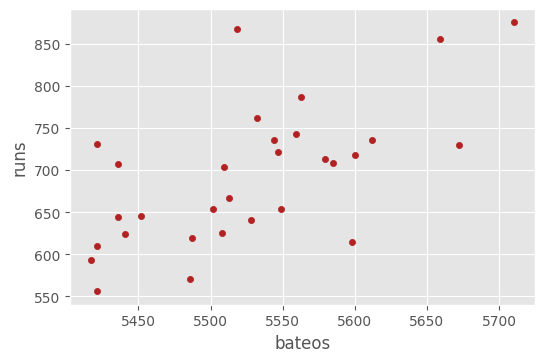

In [46]:
#gráfico
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
            x= 'bateos',
            y= 'runs',
            c= 'firebrick',
            kind= 'scatter',
            ax = ax
            )

In [47]:
#correlación lineal entre las dos variables
corr_test = pearsonr (x = datos['bateos'], y= datos['runs'])
print('Coeficiente de correlaciòn de Pearson: ', corr_test[0])
print('P-value: ', corr_test[1])

Coeficiente de correlaciòn de Pearson:  0.6347066499124214
P-value:  0.00016505916365231106


In [48]:
#división de los datos en train y test
x =  datos [['bateos']]
y = datos ['runs']

x_train, x_test, y_train, y_test = train_test_split(
    x.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size= 0.8,
    random_state=1234,
    shuffle= True)

In [52]:
#creación del modelo
modelo =  LinearRegression()
modelo.fit(X = x_train.reshape(-1,1), y = y_train)

LinearRegression()

In [53]:
# Información del modelo
print('Intercept:', modelo.intercept_)
print('Coeficiente:', list(zip(x.columns, modelo.coef_)))
print('Coeficiente de determinación R^2:', modelo.score(x, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', array([0.55287135]))]
Coeficiente de determinación R^2: 0.3863949580391576


In [55]:
#predicciones del modelo
predicciones = modelo.predict( X= x_test)
print(predicciones[0:3, ])

rmse = mean_squared_error(
            y_true = y_test,
            y_pred= predicciones,
            squared = False
            )
print(f'el error (rmse) de test es: {rmse}')

[[699.07455627]
 [720.0836677 ]
 [690.78148597]]
el error (rmse) de test es: 51.062083077251025
